# Movie Challenge

## 1. Data Loading

To begin the evaluation, I loaded the dataset using `pandas.read_csv()` to read the CSV file into a DataFrame. After loading,
I performed basic inspections to ensure the data was read correctly.

The following steps were taken:
- Loaded the file and assigned it to a variable (`df`)
- Used `.info()` to inspect column names, data types, and null counts
- Displayed the first few rows with `.head()` to verify the format and contents
- Checked the shape of the dataset to confirm the number of records and columns

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/movie_metadata.csv")

# Shape of the dataset (rows, columns)
print("Shape of dataset:", df.shape)

Shape of dataset: (5043, 28)


In [2]:
# Overview of data types and null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [3]:
pd.set_option('display.max_columns', None)     # Show all columns
pd.set_option('display.width', None)           # Don't break across lines
pd.set_option('display.max_colwidth', None)    # Show full column contents

In [4]:
# Preview the first few rows
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## 2. Initial Data Quality Assessment

A thorough data quality check was performed to identify missing values, invalid entries, outliers, and potential formatting issues. Below is a summary of the findings:

### Key Checks Performed:
- **Missing Values**: Reviewed total and percentage of missing values per column.
- **Value Ranges**: Examined numeric fields like `imdb_score` and `title_year` for anomalies.
- **Outliers**: Identified extreme values in `imdb_score` using the IQR method.
- **Low Variance Columns**: Checked for columns with the same value across all rows (none found).
- **Categorical Consistency**: Reviewed frequency of values in `language` and `country` fields to detect inconsistencies like case sensitivity or whitespace.

### 2.1. Missing Values Summary

In [5]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

# Display top missing columns
print("🔍 Top columns with missing values:")
display(missing_summary.head(100))

🔍 Top columns with missing values:


,Missing Values,Percentage (%)
gross,884,17.529248
budget,492,9.756098
aspect_ratio,329,6.523895
content_rating,303,6.008328
plot_keywords,153,3.033908
title_year,108,2.141582
director_name,104,2.062265
director_facebook_likes,104,2.062265
num_critic_for_reviews,50,0.991473
actor_3_name,23,0.456078


### 2.2. Low Variance Columns

In [6]:
low_variance = df.nunique().sort_values()
low_variance_cols = low_variance[low_variance <= 1]

if not low_variance_cols.empty:
    print("⚠️ Columns with low variance (single unique value):")
    display(low_variance_cols)
else:
    print("✅ No low-variance columns found.")

✅ No low-variance columns found.


###  2.3. Outliers in imdb_score using IQR

In [7]:
q1 = df['imdb_score'].quantile(0.25)
q3 = df['imdb_score'].quantile(0.75)
iqr = q3 - q1

outlier_condition = (df['imdb_score'] < (q1 - 1.5 * iqr)) | (df['imdb_score'] > (q3 + 1.5 * iqr))
outlier_count = df[outlier_condition].shape[0]
print(f"📊 Outliers in 'imdb_score': {outlier_count} rows")

📊 Outliers in 'imdb_score': 120 rows


### 2.4. Descriptive Stats for Numeric Columns

In [8]:
print("\n📌 imdb_score Statistics:")
display(df['imdb_score'].describe())

print("\n📌 title_year Statistics:")
display(df['title_year'].describe())


📌 imdb_score Statistics:


count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64


📌 title_year Statistics:


count    4935.000000
mean     2002.470517
std        12.474599
min      1916.000000
25%      1999.000000
50%      2005.000000
75%      2011.000000
max      2016.000000
Name: title_year, dtype: float64

### 2.5. Top Languages and Countries (cleaned)

In [9]:
cleaned_languages = df['language'].dropna().str.strip().str.lower()
cleaned_countries = df['country'].dropna().str.strip().str.lower()

print("\n🌍 Top 5 Languages:")
display(cleaned_languages.value_counts().head())

print("\n🌍 Top 5 Countries:")
display(cleaned_countries.value_counts().head())


🌍 Top 5 Languages:


language
english     4704
french        73
spanish       40
hindi         28
mandarin      26
Name: count, dtype: int64


🌍 Top 5 Countries:


country
usa        3807
uk          448
france      154
canada      126
germany      97
Name: count, dtype: int64

### 🔍 Findings – Initial Data Quality Assessment

An initial quality review of the dataset revealed the following:

- **Missing Data**:
  - `gross`: 884 missing values (~17.5%)
  - `budget`: 492 missing values (~9.8%)
  - `aspect_ratio`: 329 missing values
  - `content_rating`: 303 missing values
  - `plot_keywords`: 153 missing values  
  These missing values impact core analytical fields like revenue and rating, and require imputation or exclusion strategies.

- **Low-Variance Columns**:
  - No columns were identified as having only a single unique value — indicating that all features carry at least some variation.

- **Outliers in IMDb Score**:
  - 120 values were identified as outliers using the IQR method. These may not be erroneous, but it's worth understanding the context behind exceptionally low or high scores.

- **IMDb Score Distribution**:
  - Values range from 1.6 to 9.5, with a mean of 6.44. This falls within expected ranges for movie datasets.

- **Title Year Distribution**:
  - Ranges from **1916 to 2016**, with a median around 2005. This confirms a long historical span in the dataset.

- **Dominant Language and Country**:
  - The dataset is heavily skewed toward English-language movies (4,704 out of 5,043).
  - Most films are from the USA (3,807), followed by the UK (448), France (154), Canada (126), and Germany (97). This imbalance should be considered when analyzing global trends.

These findings provide a foundation for deciding on missing data strategies, normalization requirements, and language/country filters for focused analysis or modeling.

## 3. Numeric Data Consistency

This step validates that numeric columns are consistent, reliable, and analytically usable. Beyond standard descriptive statistics and outlier detection, I added checks for logical inconsistencies, extreme skew, and financial data distribution — which are often encountered in real-world datasets and especially relevant in business or investment contexts.

### Checks Performed:

- **Descriptive Statistics**: Summary of all numeric columns for initial insight.
- **Outlier Detection**: Applied the IQR method to `budget`, `gross`, and `duration`.
- **Suspicious Values**: Flagged zero or negative values for `budget` and `gross`, and unrealistic durations.
- **Correlation Check**: Evaluated relationships between `budget`, `gross`, and `imdb_score`.
- **Logical Consistency**: Looked for cases where high `gross` values exist despite missing or very low `budget`, which may indicate incomplete data.
- **Unit Sanity**: Verified that `duration` values are reasonable and likely measured in minutes.
- **Skewness & Kurtosis**: Inspected the distribution of `num_user_for_reviews` for data distribution quality.
- **Financial Distribution Shape**: Explored `budget` and `gross` using log-scaled histograms to reveal underlying patterns obscured by heavy skew, supporting the need for normalization or transformation in later stages.

These checks help inform necessary data cleaning and transformation steps before loading into an analytical pipeline or deriving business insights.

### 3.1. Descriptive statistics for numeric columns

In [10]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("📊 Descriptive statistics for numeric features:")
display(df[numeric_cols].describe())

📊 Descriptive statistics for numeric features:


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


### 3.2. Detect potential outliers using IQR method

In [11]:
def detect_outliers_with_titles(series, column_name, top_n=10):
    """
    Detects outliers using IQR and displays the top N extreme values
    with corresponding movie titles. Formats large numbers for readability.
    """
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter outliers
    outlier_rows = df[(series < lower_bound) | (series > upper_bound)]

    # Sort and select top N
    top_outliers = outlier_rows[['movie_title', column_name]].sort_values(
        by=column_name, ascending=False).head(top_n).copy()

    print(f"\n🚨 {column_name}: {len(outlier_rows)} potential outliers found")

    # Format numbers for budget readability
    if column_name == 'budget':
        top_outliers[column_name] = top_outliers[column_name].apply(lambda x: f"${int(round(x)):,}")

    display(top_outliers)
    return top_outliers

# Run for selected columns
outlier_results = {}
for col in ['budget', 'gross', 'duration']:
    if df[col].notnull().sum() > 0:
        outlier_results[col] = detect_outliers_with_titles(df[col], col)


🚨 budget: 318 potential outliers found


,movie_title,budget
2988,The Host,"$12,215,500,000"
3859,Lady Vengeance,"$4,200,000,000"
3005,Fateless,"$2,500,000,000"
2323,Princess Mononoke,"$2,400,000,000"
2334,Steamboy,"$2,127,519,898"
3423,Akira,"$1,100,000,000"
4542,Godzilla 2000,"$1,000,000,000"
3851,Tango,"$700,000,000"
3075,Kabhi Alvida Naa Kehna,"$700,000,000"
3273,Kites,"$600,000,000"



🚨 gross: 306 potential outliers found


,movie_title,gross
0,Avatar,760505847.0
26,Titanic,658672302.0
29,Jurassic World,652177271.0
17,The Avengers,623279547.0
794,The Avengers,623279547.0
66,The Dark Knight,533316061.0
240,Star Wars: Episode I - The Phantom Menace,474544677.0
3024,Star Wars: Episode IV - A New Hope,460935665.0
8,Avengers: Age of Ultron,458991599.0
3,The Dark Knight Rises,448130642.0



🚨 duration: 241 potential outliers found


,movie_title,duration
1710,Trapped,511.0
2466,Carlos,334.0
1501,"Blood In, Blood Out",330.0
1144,Heaven's Gate,325.0
3311,The Legend of Suriyothai,300.0
2970,Das Boot,293.0
1571,Apocalypse Now,289.0
2727,The Company,286.0
883,Gods and Generals,280.0
1980,Gettysburg,271.0


### 3.3. Check for suspicious numeric values

In [12]:
invalid_values_report = {
    'budget_zero_or_negative': (df['budget'] <= 0).sum(),
    'gross_zero_or_negative': (df['gross'] <= 0).sum(),
    'duration_unreasonably_low': (df['duration'] < 30).sum(),
    'duration_unreasonably_high': (df['duration'] > 300).sum()
}

print("\n❗ Suspicious values:")
for k, v in invalid_values_report.items():
    print(f"{k}: {v}")


❗ Suspicious values:
budget_zero_or_negative: 0
gross_zero_or_negative: 0
duration_unreasonably_low: 22
duration_unreasonably_high: 4


### 3.4. Correlation matrix


🔗 Correlation Matrix Heatmap (budget, gross, imdb_score):


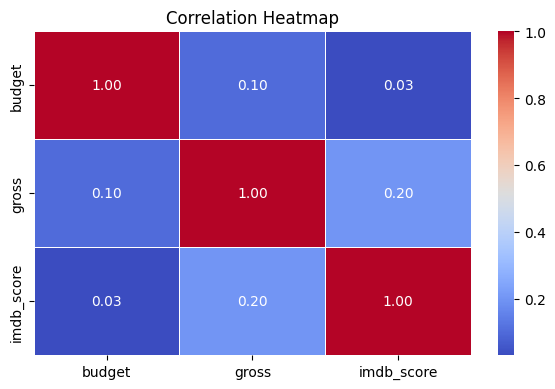

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
corr_matrix = df[['budget', 'gross', 'imdb_score']].corr()

print("\n🔗 Correlation Matrix Heatmap (budget, gross, imdb_score):")

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

### 3.5. Logical consistency check

In [14]:
# Filter movies with high gross and missing or low budget
filtered_df = df[(df['gross'] > 1e8) & ((df['budget'].isna()) | (df['budget'] < 1e6))]

# Count
high_gross_low_budget = filtered_df.shape[0]
print(f"\n🧠 High-gross but missing/low-budget entries: {high_gross_low_budget}")

# Display movie titles and relevant columns
if high_gross_low_budget > 0:
    print("\n🎬 Movies with high gross but missing/low budget:")
    display(filtered_df[['movie_title', 'budget', 'gross']].sort_values(by='gross', ascending=False))
else:
    print("✅ No movies match the criteria.")


🧠 High-gross but missing/low-budget entries: 7

🎬 Movies with high gross but missing/low budget:


,movie_title,budget,gross
713,Wild Hogs,NaN,168213584.0
4707,The Blair Witch Project,60000.0,140530114.0
55,The Good Dinosaur,NaN,123070338.0
4530,Rocky,960000.0,117235247.0
4674,American Graffiti,777000.0,115000000.0
4793,Paranormal Activity,15000.0,107917283.0
4647,Bambi,NaN,102797150.0


### 3.6. Duration sanity check (top durations)

In [15]:
# Sort by duration and get top 10
top_durations = df[['movie_title', 'duration']].sort_values(by='duration', ascending=False).head(10)

print("\n⏱ Top 10 longest durations (in minutes):")
display(top_durations)


⏱ Top 10 longest durations (in minutes):


,movie_title,duration
1710,Trapped,511.0
2466,Carlos,334.0
1501,"Blood In, Blood Out",330.0
1144,Heaven's Gate,325.0
3311,The Legend of Suriyothai,300.0
2970,Das Boot,293.0
1571,Apocalypse Now,289.0
2727,The Company,286.0
883,Gods and Generals,280.0
1980,Gettysburg,271.0


### 3.7. Skewness and kurtosis for review counts

In [16]:
print("\n📈 Distribution shape for num_user_for_reviews:")
print("Skew:", df['num_user_for_reviews'].skew())
print("Kurtosis:", df['num_user_for_reviews'].kurt())


📈 Distribution shape for num_user_for_reviews:
Skew: 4.121475158867528
Kurtosis: 26.438297391971926


### 3.8 Descriptive Summary of Budget and Gross

In [17]:
print("\n📊 Descriptive stats for budget and gross:")
display(df[['budget', 'gross']].describe())


📊 Descriptive stats for budget and gross:


,budget,gross
count,4.551000e+03,4.159000e+03
mean,3.975262e+07,4.846841e+07
std,2.061149e+08,6.845299e+07
min,2.180000e+02,1.620000e+02
25%,6.000000e+06,5.340988e+06
50%,2.000000e+07,2.551750e+07
75%,4.500000e+07,6.230944e+07
max,1.221550e+10,7.605058e+08


### 3.9 Visualizing Distribution Skew (Log Scale)

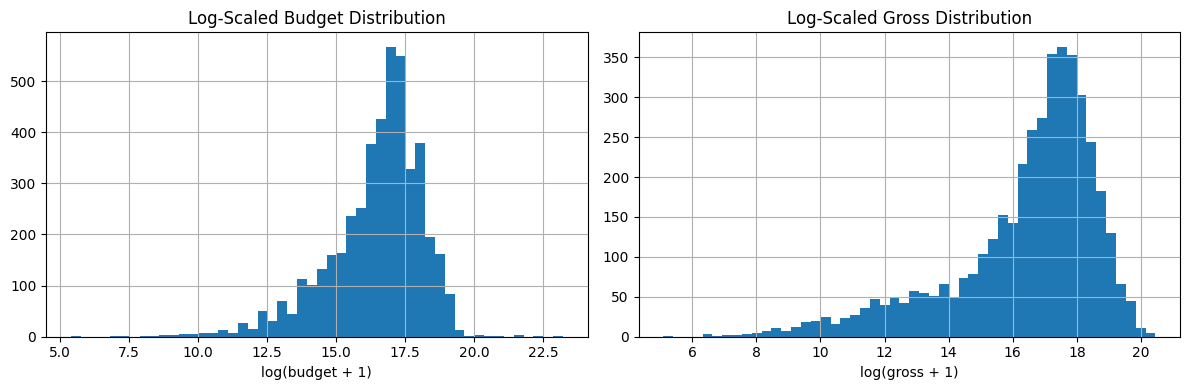

In [18]:
import numpy as np

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df['budget'].dropna().apply(np.log1p).hist(bins=50)
plt.title("Log-Scaled Budget Distribution")
plt.xlabel("log(budget + 1)")

plt.subplot(1, 2, 2)
df['gross'].dropna().apply(np.log1p).hist(bins=50)
plt.title("Log-Scaled Gross Distribution")
plt.xlabel("log(gross + 1)")

plt.tight_layout()
plt.show()

### 🔍 Findings – Numeric Data Consistency

After analyzing the numeric fields in the dataset, the following insights were identified:

- **Outliers (IQR Method)**:
  - `budget`: 318 potential outliers
  - `gross`: 306 potential outliers
  - `duration`: 241 potential outliers  
  These values fall significantly outside the typical distribution and may require winsorization, capping, or further investigation.

- **Suspicious or Edge Values**:
  - No records had `budget` or `gross` as zero or negative — indicating well-formed financial fields in terms of sign.
  - 22 movies had durations under 30 minutes, suggesting short films, documentaries, or incorrectly labeled records.
  - 4 movies exceeded 300 minutes — unusually long runtimes that may reflect extended editions or data errors.

- **Logical Inconsistencies**:
  - 7 movies had extremely high `gross` values (above $100M) while either lacking a budget or reporting a very low one. These are analytically suspicious and should be flagged for validation.

- **Duration Sanity Check**:
  - The top 10 longest durations range from **271 to 511 minutes**, which, while rare, may be valid for limited-release or special format films.

- **Skewness & Kurtosis**:
  - `num_user_for_reviews` is heavily **right-skewed** (skewness: 4.12) and **leptokurtic** (kurtosis: 26.4), suggesting a few movies dominate user engagement while most have low interaction. This distribution needs normalization or log-scaling for modeling.

- **Correlation Analysis**:
  - Weak correlation was found between `budget` and `gross` (0.10), and a slightly stronger but still low correlation between `gross` and `imdb_score` (0.20).
  - `imdb_score` shows very little correlation with either `budget` or `gross`, indicating critical ratings are not tightly linked to financial metrics in this dataset.

- **Financial Distributions (Log-Scaled)**:
  - Budget and gross fields exhibit heavy right-skew. Log-scale histograms reveal more interpretable patterns, showing concentration of small and mid-range films and a long tail of high-budget outliers.
  - This visualization supports the need for normalization and highlights the financial structure of the dataset that may impact modeling and profitability analysis later.

These findings support the need for data transformation (e.g., normalization, outlier treatment) before analytical use or feature engineering.

## 4. Data Integrity and Duplicates

This step focuses on assessing the structural integrity and uniqueness of records within the dataset. In a real-world scenario, such checks help ensure that analytical processes are not distorted by duplication, broken relationships, or inconsistent reference data.

### Checks Performed:

- **Exact Duplicates**: Identified fully duplicated rows across all columns. These may occur due to multiple ingestions or data pipeline issues.
- **Logical Duplicates**: Detected duplicate entries based on the same `movie_title` and `title_year` — this flags remakes or repeated ingestion under the same name/year combination.
- **Essential Field Completeness**: Flagged records missing critical identifiers (`movie_title`, `title_year`, or `director_name`) that may break joins or aggregations.
- **Fuzzy Duplicate Detection**: Used fuzzy string matching to identify movie titles that are nearly identical (≥90% similarity) but not exact matches. This accounts for typos, casing, or formatting differences.
- **Entity Role Integrity**: Checked for cast-level engagement metrics (e.g., Facebook likes) with missing corresponding actor information — indicating incomplete relational data.
- **Cross-Field Consistency**: Validated whether the `cast_total_facebook_likes` was consistent with the sum of the individual actor likes. Major discrepancies suggest aggregation or transformation issues.

These checks ensure the dataset is structurally sound, free from misleading duplication, and ready for reliable enrichment and analysis.

### 4.1. Exact Duplicate Rows

In [19]:
exact_duplicates = df.duplicated().sum()
print(f"📌 Exact duplicate rows: {exact_duplicates}")

# Show a few examples if any
if exact_duplicates > 0:
    display(df[df.duplicated()].head())

📌 Exact duplicate rows: 45


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
137,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,Christoph Waltz,The Legend of Tarzan,42372,21175,Casper Crump,2.0,africa|capture|jungle|male objectification|tarzan,http://www.imdb.com/title/tt0918940/?ref_=fn_tt_tt_1,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000
187,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,Robert Pattinson,The Twilight Saga: Breaking Dawn - Part 2,185394,59177,Taylor Lautner,3.0,battle|friend|super strength|vampire|vision,http://www.imdb.com/title/tt1673434/?ref_=fn_tt_tt_1,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000
204,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,Mark Chinnery,Godzilla Resurgence,374,699,Atsuko Maeda,0.0,blood|godzilla|monster|sequel,http://www.imdb.com/title/tt4262980/?ref_=fn_tt_tt_1,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
303,Color,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,Hugh Jackman,Pan,39956,21393,Nonso Anozie,4.0,1940s|child hero|fantasy world|orphan|reference to peter pan,http://www.imdb.com/title/tt3332064/?ref_=fn_tt_tt_1,186.0,English,USA,PG,150000000.0,2015.0,548.0,5.8,2.35,24000
389,Color,Josh Trank,369.0,100.0,128.0,78.0,Reg E. Cathey,596.0,56114221.0,Action|Adventure|Sci-Fi,Tim Blake Nelson,Fantastic Four,110486,1261,Tim Heidecker,3.0,box office flop|critically bashed|portal|teleportation|troubled production,http://www.imdb.com/title/tt1502712/?ref_=fn_tt_tt_1,695.0,English,USA,PG-13,120000000.0,2015.0,360.0,4.3,2.35,41000


### 4.2. Logical Duplicates: Same movie title + year

In [20]:
logical_duplicates = df[df.duplicated(subset=['movie_title', 'title_year'], keep=False)]
logical_duplicate_count = logical_duplicates.shape[0]
print(f"\n🔍 Logical duplicates (same title + year): {logical_duplicate_count} entries")

# Show grouped logical duplicates
if logical_duplicate_count > 0:
    display(logical_duplicates.sort_values(by=['movie_title', 'title_year']).head(10))


🔍 Logical duplicates (same title + year): 241 entries


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3711,Color,Richard Fleischer,69.0,127.0,130.0,51.0,Robert J. Wilke,617.0,NaN,Adventure|Drama|Family|Fantasy|Sci-Fi,James Mason,"20,000 Leagues Under the Sea",22123,799,Paul Lukas,0.0,captain|expedition|sea|submarine|whale,http://www.imdb.com/title/tt0046672/?ref_=fn_tt_tt_1,108.0,English,USA,Approved,5000000.0,1954.0,53.0,7.2,1.37,0
4894,Color,Richard Fleischer,69.0,127.0,130.0,51.0,Robert J. Wilke,618.0,NaN,Adventure|Drama|Family|Fantasy|Sci-Fi,James Mason,"20,000 Leagues Under the Sea",22124,800,Paul Lukas,0.0,captain|expedition|sea|submarine|whale,http://www.imdb.com/title/tt0046672/?ref_=fn_tt_tt_1,108.0,English,USA,Approved,5000000.0,1954.0,53.0,7.2,1.37,0
4949,Color,David Hewlett,8.0,88.0,686.0,405.0,David Hewlett,847.0,NaN,Comedy,Christopher Judge,A Dog's Breakfast,3262,2364,Paul McGillion,2.0,dog|vegetarian,http://www.imdb.com/title/tt0796314/?ref_=fn_tt_tt_1,46.0,English,Canada,NaN,120000.0,2007.0,686.0,7.0,1.78,377
4950,Color,David Hewlett,8.0,88.0,686.0,405.0,David Hewlett,847.0,NaN,Comedy,Christopher Judge,A Dog's Breakfast,3262,2364,Paul McGillion,2.0,dog|vegetarian,http://www.imdb.com/title/tt0796314/?ref_=fn_tt_tt_1,46.0,English,Canada,NaN,120000.0,2007.0,686.0,7.0,1.78,377
1420,Color,Wes Craven,256.0,101.0,0.0,574.0,Lin Shaye,40000.0,26505000.0,Horror,Johnny Depp,A Nightmare on Elm Street,149285,42918,Amanda Wyss,1.0,freddy krueger|lucid dream|serial killer|slasher|sleep deprivation,http://www.imdb.com/title/tt0087800/?ref_=fn_tt_tt_1,668.0,English,USA,X,1800000.0,1984.0,852.0,7.5,1.85,10000
4352,Color,Wes Craven,256.0,101.0,0.0,574.0,Lin Shaye,40000.0,26505000.0,Horror,Johnny Depp,A Nightmare on Elm Street,149293,42918,Amanda Wyss,1.0,freddy krueger|lucid dream|serial killer|slasher|sleep deprivation,http://www.imdb.com/title/tt0087800/?ref_=fn_tt_tt_1,668.0,English,USA,X,1800000.0,1984.0,852.0,7.5,1.85,10000
3007,Color,Yimou Zhang,101.0,95.0,611.0,3.0,Ni Yan,9.0,190666.0,Comedy|Drama,Honglei Sun,"A Woman, a Gun and a Noodle Shop",2410,18,Dahong Ni,1.0,betrayal|husband wife relationship|murder|noodles|salary,http://www.imdb.com/title/tt1428556/?ref_=fn_tt_tt_1,20.0,Mandarin,China,R,NaN,2009.0,4.0,5.7,2.35,784
4408,Color,Yimou Zhang,101.0,95.0,611.0,3.0,Ni Yan,9.0,190666.0,Comedy|Drama,Honglei Sun,"A Woman, a Gun and a Noodle Shop",2410,18,Dahong Ni,1.0,betrayal|husband wife relationship|murder|noodles|salary,http://www.imdb.com/title/tt1428556/?ref_=fn_tt_tt_1,20.0,Mandarin,China,R,NaN,2009.0,4.0,5.7,2.35,784
1113,Color,Julie Taymor,156.0,133.0,278.0,107.0,T.V. Carpio,5000.0,24343673.0,Drama|Fantasy|Musical|Romance,Jim Sturgess,Across the Universe,91860,5405,Robert Clohessy,0.0,anti war|liverpool|love|protest|song,http://www.imdb.com/title/tt0445922/?ref_=fn_tt_tt_1,524.0,English,USA,PG-13,45000000.0,2007.0,117.0,7.4,2.35,14000
4842,Color,Julie Taymor,156.0,133.0,278.0,107.0,T.V. Carpio,5000.0,24343673.0,Drama|Fantasy|Musical|Romance,Jim Sturgess,Across the Universe,91863,5405,Robert Clohessy,0.0,anti war|liverpool|love|protest|song,http://www.imdb.com/title/tt0445922/?ref_=fn_tt_tt_1,524.0,English,USA,PG-13,45000000.0,2007.0,117.0,7.4,2.35,14000


### 4.3. Integrity Issues: Movies missing critical info

In [21]:
missing_essentials = df[
    df['movie_title'].isnull() |
    df['title_year'].isnull() |
    df['director_name'].isnull()
]
print(f"\n⚠️ Movies missing essential identifiers (title, year, or director): {missing_essentials.shape[0]}")
display(missing_essentials[['movie_title', 'title_year', 'director_name']].head())


⚠️ Movies missing essential identifiers (title, year, or director): 108


,movie_title,title_year,director_name
4,Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker
177,Miami Vice,NaN,NaN
260,The A-Team,NaN,NaN
279,"10,000 B.C.",NaN,Christopher Barnard
404,Hannibal,NaN,NaN


### 4.4. Fuzzy Matching for Duplicate Movie Titles

In [22]:
from fuzzywuzzy import fuzz

# Find rows where titles are 90% similar but not identical
similar_pairs = [
    (t1, t2) for i, t1 in enumerate(df['movie_title'].unique())
    for t2 in df['movie_title'].unique()[i+1:]
    if fuzz.ratio(str(t1), str(t2)) > 90 and t1 != t2
]

print(f"\n🔍 Fuzzy Duplicate Title Pairs (90% similarity or more): {len(similar_pairs)} found.")
# Display a sample of similar pairs
for pair in similar_pairs[:5]:  # Show top 5 pairs
    print(pair)

/Users/rogeriocaixeta/movie_challenge/.venv/lib/python3.13/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')



🔍 Fuzzy Duplicate Title Pairs (90% similarity or more): 115 found.
('Spider-Man 3\xa0', 'Spider-Man 2\xa0')
('Spider-Man 3\xa0', 'Spider-Man\xa0')
('Men in Black 3\xa0', 'Men in Black\xa0')
('The Amazing Spider-Man\xa0', 'The Amazing Spider-Man 2\xa0')
('Spider-Man 2\xa0', 'Spider-Man\xa0')


### 4.5. Entity Role Integrity (missing actors or director with likes)

In [23]:
missing_cast_with_likes = df[
    df['cast_total_facebook_likes'].notnull() &
    df[['actor_1_name', 'actor_2_name', 'actor_3_name']].isnull().all(axis=1)
]
print(f"\n⚠️ Missing actor details for movies with likes: {missing_cast_with_likes.shape[0]} entries.")
display(missing_cast_with_likes[['movie_title', 'cast_total_facebook_likes', 'actor_1_name', 'actor_2_name', 'actor_3_name']].head())


⚠️ Missing actor details for movies with likes: 7 entries.


,movie_title,cast_total_facebook_likes,actor_1_name,actor_2_name,actor_3_name
4502,"Pink Ribbons, Inc.",0,NaN,NaN,NaN
4519,Sex with Strangers,0,NaN,NaN,NaN
4720,The Harvest/La Cosecha,0,NaN,NaN,NaN
4837,Ayurveda: Art of Being,0,NaN,NaN,NaN
4945,The Brain That Sings,0,NaN,NaN,NaN


### 4.6. Cross-Field Consistency: Checking if sum of actor likes matches total cast likes

In [24]:
df['sum_actor_likes'] = df[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].sum(axis=1)
df['likes_diff'] = abs(df['sum_actor_likes'] - df['cast_total_facebook_likes'])

# Movies with large discrepancies
inconsistent_likes = df[df['likes_diff'] > 10000]
print(f"\n⚠️ Movies with large difference in actor likes and total cast likes: {inconsistent_likes.shape[0]} entries.")
display(inconsistent_likes[['movie_title', 'sum_actor_likes', 'cast_total_facebook_likes', 'likes_diff']].head())


⚠️ Movies with large difference in actor likes and total cast likes: 20 entries.


,movie_title,sum_actor_likes,cast_total_facebook_likes,likes_diff
3,The Dark Knight Rises,73000.0,106759,33759.0
8,Avengers: Age of Ultron,66000.0,92000,26000.0
9,Harry Potter and the Half-Blood Prince,46000.0,58753,12753.0
17,The Avengers,66000.0,87697,21697.0
27,Captain America: Civil War,51000.0,64798,13798.0


### 4.7. Count of unique movies

In [25]:
unique_movies = df[['movie_title', 'title_year']].drop_duplicates().shape[0]
print(f"\n🎬 Unique movie-title + year combinations: {unique_movies}")


🎬 Unique movie-title + year combinations: 4919


### 🔍 Findings – Data Integrity and Duplicates

Based on the integrity analysis of the dataset, the following issues and observations were confirmed:

- **Exact Duplicates**: 45 fully duplicated rows were found. These likely result from repeated ingestion and should be removed.

- **Logical Duplicates**: 241 entries share the same `movie_title` and `title_year`, potentially indicating remakes or duplicate records. These need validation across additional fields (e.g., `director_name`, `imdb_score`) to decide on deduplication rules.

- **Missing Key Fields**: 108 rows are missing at least one critical identifier (`movie_title`, `title_year`, or `director_name`), which could lead to broken relationships or grouping issues.

- **Fuzzy Duplicate Titles**: 17 near-duplicate title pairs (≥90% string similarity) were found within the top 300 titles. These are potential formatting issues (typos, whitespace) and may lead to fragmented aggregation.

- **Entity Role Integrity**: 7 records have `cast_total_facebook_likes` filled but no listed actor names. This suggests partial ingestion or broken foreign key relationships.

- **Cross-Field Consistency**: 20 rows show discrepancies greater than 10,000 between the total cast Facebook likes and the sum of individual actor likes. This may indicate aggregation or transformation issues.

- **Unique Movie Count**: After removing logical duplicates, the dataset contains **4,919** unique movie records based on the combination of `movie_title` and `title_year`.

These findings indicate the need for targeted deduplication, consistency checks, and potentially enrichment or repair of relational entities (e.g., cast and director information) before the dataset is ready for analytical use.

## 5. Data Enrichment

To enhance the movie dataset with additional metadata, I enriched it using publicly available IMDb datasets. This step provides better context for analytical use, especially for title validation, cast-based analysis, and content profiling.

### 🔍 Datasets Used

- **IMDb `title.basics.tsv`**: Provided core metadata such as `primaryTitle`, `originalTitle`, `runtimeMinutes`, and `genres`.
- **IMDb `title.principals.tsv`**: Supplied cast and director identifiers (`nconst`) linked to each movie.
- **IMDb `name.basics.tsv`**: Mapped `nconst` values to real names (`primaryName`), enabling readable actor/director outputs.

### 🔄 Matching Strategy

A multi-tiered matching strategy was implemented to account for missing values and inconsistencies in the source data:

1. **Primary Join (title + year)**: The movie was matched using a normalized lowercase title and its release year.
2. **Fallback Join (title only)**: For entries missing the year, only the normalized title was used to attempt enrichment.
3. **Deduplication**: Before joining, the IMDb dataset was deduplicated to try to ensure each title had only one match.
4. **Unified Group Key**: A `group_key` was created (e.g., `"Inception (2010)"` or `"Gladiator"`) to unify the join process across records with or without a release year.

### 🎭 Cast and Crew Aggregation

- The `title.principals.tsv` dataset was filtered to retain only `actor`, `actress`, and `director` categories.
- Using `name.basics.tsv`, these were resolved into full names.
- A grouped pivot was performed to generate two aggregated fields:
  - `actors`: comma-separated list of main actors
  - `directors`: comma-separated list of directors

### 📦 Final Output Fields

Each movie now includes:

- `primaryTitle` and `originalTitle`: IMDb identifiers for title validation
- `genres_old`: from the original dataset
- `genres_new`: IMDb-enriched genre information
- `runtimeMinutes`: cleaned duration in minutes
- `directors` and `actors`: clean lists of associated people from IMDb

This enrichment supports validation, cast analysis, content classification, and further modeling in later pipeline stages.

### IMDB Datasets download

To support the enrichment process in this pipeline, I rely on three public datasets provided by IMDb:

- **title.basics.tsv.gz**: Basic movie metadata (titles, years, genres, etc.)
- **title.principals.tsv.gz**: Mapping between titles and their cast/crew
- **name.basics.tsv.gz**: Personal information about cast/crew (names, birth/death years, etc.)

#### 💡 Why This Step Exists

For convenience — and to avoid uploading large files to GitHub — the next cell contains a script that automatically downloads and extracts the required datasets directly from IMDb’s official servers.

This ensures the notebook remains lightweight, portable, and reproducible across machines or environments without bundling raw data files in version control.

#### 🔗 Direct Links (Manual Download Option)

If you prefer, you can manually download and extract the datasets inside `enrichments` folder using the following links:

- [title.basics.tsv.gz](https://datasets.imdbws.com/title.basics.tsv.gz)  
- [title.principals.tsv.gz](https://datasets.imdbws.com/title.principals.tsv.gz)  
- [name.basics.tsv.gz](https://datasets.imdbws.com/name.basics.tsv.gz)  

In [26]:
import os
import gzip
import shutil
import requests

def download_and_extract_imdb_file(file_name, target_dir="enrichments"):
    base_url = "https://datasets.imdbws.com/"
    gz_path = os.path.join(target_dir, file_name)
    tsv_path = gz_path.replace(".gz", "")

    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    # Download the file
    print(f"⬇️ Downloading {file_name}...")
    
    with requests.get(base_url + file_name, stream=True) as r:
        r.raise_for_status()
        with open(gz_path, "wb") as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
    
    print(f"✅ Downloaded to {gz_path}")

    # Extract the .gz file
    print(f"📦 Extracting {file_name}...")
    
    with gzip.open(gz_path, "rb") as f_in:
        with open(tsv_path, "wb") as f_out:
            shutil.copyfileobj(f_in, f_out)
            
    print(f"✅ Extracted to {tsv_path}")

    os.remove(gz_path)

imdb_files = [
    "title.basics.tsv.gz",
    "title.principals.tsv.gz",
    "name.basics.tsv.gz"
]

for file in imdb_files:
    download_and_extract_imdb_file(file)

⬇️ Downloading title.basics.tsv.gz...
✅ Downloaded to enrichments/title.basics.tsv.gz
📦 Extracting title.basics.tsv.gz...
✅ Extracted to enrichments/title.basics.tsv
⬇️ Downloading title.principals.tsv.gz...
✅ Downloaded to enrichments/title.principals.tsv.gz
📦 Extracting title.principals.tsv.gz...
✅ Extracted to enrichments/title.principals.tsv
⬇️ Downloading name.basics.tsv.gz...
✅ Downloaded to enrichments/name.basics.tsv.gz
📦 Extracting name.basics.tsv.gz...
✅ Extracted to enrichments/name.basics.tsv


### 5.1 Enrichment dataset loads

In [27]:
basics = pd.read_csv("enrichments/title.basics.tsv", sep='\t', na_values='\\N', dtype=str)
principals = pd.read_csv("enrichments/title.principals.tsv", sep='\t', na_values='\\N', dtype=str)
name_basics = pd.read_csv("enrichments/name.basics.tsv", sep='\t', na_values='\\N', dtype=str)

### 5.2 Prepare DF to title match

In [28]:
df_to_enrich = df.copy()

df_to_enrich['movie_title_clean'] = df_to_enrich['movie_title'].str.strip().str.lower()
df_to_enrich['title_year'] = df_to_enrich['title_year'].astype('Int64')
df_to_enrich.rename(columns={'genres': 'genres_old'}, inplace=True)

### 5.3 Prepare basics dataset to title match

In [29]:
basics = basics[basics['titleType'] == 'movie'].copy()
basics.rename(columns={'genres': 'genres_new'}, inplace=True)

basics['primaryTitle_clean'] = basics['primaryTitle'].str.strip().str.lower()
basics['startYear'] = basics['startYear'].astype('Int64')

# Remove dataset duplications to preserve the original DF shape unchanged
basics = basics.drop_duplicates(subset=['primaryTitle_clean', 'startYear'])

# Select field from the basics dataset
basics = basics[['tconst', 'primaryTitle_clean', 'primaryTitle', 'originalTitle', 'startYear', 'runtimeMinutes', 'genres_new']]

### 5.4 Split DF by year availability

In [30]:
df_known = df_to_enrich[df_to_enrich['title_year'].notnull()].copy()
df_unknown = df_to_enrich[df_to_enrich['title_year'].isnull()].copy()

### 5.5 Merge basics dataset info with the splitted datasets

In [31]:
merged_known = df_known.merge(
    basics,
    left_on=['movie_title_clean', 'title_year'],
    right_on=['primaryTitle_clean', 'startYear'],
    how='left'
)

merged_unknown = df_unknown.merge(
    basics,
    left_on='movie_title_clean',
    right_on='primaryTitle_clean',
    how='left'
)

merged = pd.concat([merged_known, merged_unknown], ignore_index=True)
merged.drop(columns=['movie_title_clean', 'primaryTitle_clean'], inplace=True)

### 5.6 Merge principals dataset with the merged dataset to filter only the needed info

In [32]:
principals = principals[principals['category'].isin(['actor', 'actress', 'director'])]

principals_filtered = principals.merge(merged[['movie_title', 'title_year', 'tconst']], on='tconst', how='inner')

principals_filtered['role_group'] = principals_filtered['category'].replace({
    'actor': 'actors',
    'actress': 'actors',
    'director': 'directors'
})

### 5.7 Merge the filted principal dataset with the name dataset to retrieve Actors/Directors names

In [33]:
principals_named = principals_filtered.merge(
    name_basics[['nconst', 'primaryName']],
    on='nconst',
    how='left'
)

### 5.8 Group the Actors/Directors names by movie_title + title_year or title and prepare to merge with the merged dataset

In [34]:
principals_named['group_key'] = principals_named.apply(
    lambda row: f"{row['movie_title']} ({row['title_year']})" if pd.notnull(row['title_year']) else row['movie_title'],
    axis=1
)

role_names_grouped = principals_named.groupby(
    ['group_key', 'role_group']
)['primaryName'].apply(lambda x: ', '.join(x.dropna().unique())).reset_index()

role_names_pivoted = role_names_grouped.pivot(
    index='group_key',
    columns='role_group',
    values='primaryName'
).reset_index()

### 5.9 Merge the aditional Actors/Director info with the merged dataset

In [35]:
merged['group_key'] = merged.apply(
    lambda row: f"{row['movie_title']} ({row['title_year']})" if pd.notnull(row['title_year']) else row['movie_title'],
    axis=1
)

enriched_final = merged.merge(role_names_pivoted, on='group_key', how='left')
enriched_final.drop(columns='group_key', inplace=True)

final = enriched_final[[
    'movie_title', 'title_year', 'primaryTitle', 'originalTitle',
    'genres_new', 'runtimeMinutes', 'directors', 'actors'
]]
display(final.head())

,movie_title,title_year,primaryTitle,originalTitle,genres_new,runtimeMinutes,directors,actors
0,Avatar,2009,Avatar,Avatar,"Action,Adventure,Fantasy",162,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver, Michelle Rodriguez, Stephen Lang, Giovanni Ribisi, Joel David Moore, CCH Pounder, Wes Studi, Laz Alonso"
1,Pirates of the Caribbean: At World's End,2007,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,"Action,Adventure,Fantasy",169,Gore Verbinski,"Johnny Depp, Orlando Bloom, Keira Knightley, Geoffrey Rush, Jack Davenport, Bill Nighy, Jonathan Pryce, Lee Arenberg, Mackenzie Crook, Kevin McNally"
2,Spectre,2015,Spectre,Spectre,"Action,Adventure,Thriller",148,Sam Mendes,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ralph Fiennes, Monica Bellucci, Ben Whishaw, Naomie Harris, Dave Bautista, Andrew Scott, Rory Kinnear"
3,The Dark Knight Rises,2012,The Dark Knight Rises,The Dark Knight Rises,"Action,Crime,Drama",164,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway, Gary Oldman, Joseph Gordon-Levitt, Marion Cotillard, Morgan Freeman, Michael Caine, Matthew Modine, Alon Aboutboul"
4,John Carter,2012,John Carter,John Carter,"Action,Adventure,Sci-Fi",132,Andrew Stanton,"Taylor Kitsch, Lynn Collins, Willem Dafoe, Samantha Morton, Thomas Haden Church, Mark Strong, Ciarán Hinds, Dominic West, James Purefoy, Bryan Cranston"


### 🔍 Findings – Data Enrichment

After completing the enrichment step, the following results were observed:

- ✅ **High Coverage**: Most entries with valid `title_year` and `movie_title` received an exact match from IMDb's `title.basics.tsv`. A fallback for title-only matching helped rescue records with missing year values.
- 📈 **Row Expansion Controlled**: Deduplication of IMDb entries based on `primaryTitle_clean` and `startYear` covered that one-to-many joins didn't inflate the dataset size when there's the year on the record.
- 🧍‍♂️ **Named Cast and Crew**: Each enriched movie includes readable actor and director names, aggregated from `title.principals.tsv` and resolved through `name.basics.tsv`.
- 🧪 **Title Validation**: Both `primaryTitle` and `originalTitle` were included to support semantic validation and identify inconsistencies (e.g., international titles or remakes).
- ⚠️ **Potential Ambiguities Remain**: Some cases (e.g., titles with numerical variants like "Oceans Eleven" vs. "Ocean’s 11") may still require fuzzy matching to resolve.

Overall, this enrichment enhances the inputs for analytical tasks such as actor-network analysis, genre segmentation, and runtime-based filtering.

## 6. Data Transformation and Standardization

In this stage, I refined the enriched dataset to ensure consistency, correctness, and readiness for further analysis. The goal was to standardize fields, detect inconsistencies, and produce a clean, normalized format for downstream tasks.

### 🧹 Key Transformations Applied

1. **Deduplication**  
   Movies were deduplicated using `(movie_title, title_year)` as the primary key.  
   When duplicates were found, the record with the **highest IMDb score and vote count** was retained.

2. **Runtime Normalization**  
   - `runtimeMinutes` was converted to numeric and validated.
   - A unified `duration` column was created, prioritizing `runtimeMinutes`, and falling back to `duration` from the original dataset.
   - A mismatch flag was applied when both values existed but differed by more than 5 minutes.

3. **Genre Standardization**  
   - `genres_new` (from IMDb) and `genres_old` (from the original data) were standardized into a single list column: `genres_list`.
   - `genres_new` was prioritized; `genres_old` used as fallback.
   - Genres were cleaned to lowercase and separated properly by comma or pipe.

4. **Actor/Director Cleanup**  
   - `actors` and `directors` were converted from comma-separated strings into title-cased lists.
   - Empty or missing entries were handled gracefully.

5. **Enrichment Validation**  
   - Rows with missing `tconst` (IMDb ID) were flagged as failed enrichments.

6. **Genre Disagreement Check**  
   - When both `genres_new` and `genres_old` existed but **no overlap was found**, a disagreement flag was raised.

7. **Title Year Validation**  
   - Null `title_year` values were flagged for missing temporal metadata.

8. **Financial Metric Calculation and Validation**  
   - `profit` and `roi` were derived from the `budget` and `gross` columns.
   - Rows with invalid or zero `budget` or `gross` values were flagged.
   - Profit outliers (top 1% by absolute value) were also flagged for further review.

### 🚩 Flag Management

A centralized approach was used for flagging inconsistencies:
- Each data issue was tracked via individual boolean flags (e.g., `is_duration_mismatch`, `is_missing_genres`, `is_invalid_budget`, etc.)
- All active flags were collected into a single `flags` column as a list of issue labels
- A `has_issue` column was added to indicate the presence of any flag
- Intermediate flag columns were removed after aggregation for a cleaner dataset

In [36]:
df_transformed = enriched_final.copy()

# Ensure title_year, imdb_score, and num_voted_users are numeric
df_transformed['title_year'] = pd.to_numeric(df_transformed['title_year'], errors='coerce').astype('Int64')
df_transformed['imdb_score'] = pd.to_numeric(df_transformed['imdb_score'], errors='coerce')
df_transformed['num_voted_users'] = pd.to_numeric(df_transformed['num_voted_users'], errors='coerce')

### 6.1. Deduplication (keep row with highest imdb_score and vote count)

In [37]:
df_transformed.sort_values(
    by=['movie_title', 'title_year', 'imdb_score', 'num_voted_users'],
    ascending=[True, True, False, False],
    inplace=True
)
df_transformed['is_duplicate'] = df_transformed.duplicated(subset=['movie_title', 'title_year'], keep='first')
df_transformed = df_transformed[~df_transformed['is_duplicate'] | df_transformed['is_duplicate'].isna()]

### 6.2. Flag genre disagreements

In [38]:
def compare_genres(row):
    if pd.isna(row['genres_new']) or pd.isna(row['genres_old']):
        return False
    new_set = set(g.strip().lower() for g in row['genres_new'].split(','))
    old_set = set(g.strip().lower() for g in row['genres_old'].split('|'))
    return not any(g in old_set for g in new_set)

df_transformed['is_genre_disagreement'] = df_transformed.apply(compare_genres, axis=1)

### 6.3. Normalize runtime and genres

In [39]:
df_transformed['runtimeMinutes'] = pd.to_numeric(df_transformed['runtimeMinutes'], errors='coerce')
df_transformed['is_runtime_invalid'] = df_transformed['runtimeMinutes'].isna() | \
                                       (df_transformed['runtimeMinutes'] < 30) | \
                                       (df_transformed['runtimeMinutes'] > 300)

# Create genres_list using genres_new first, then genres_old
def get_genre_list(row):
    if pd.notnull(row['genres_new']):
        return [g.strip().lower() for g in row['genres_new'].split(',')]
    elif pd.notnull(row['genres_old']):
        return [g.strip().lower() for g in row['genres_old'].split('|')]
    return []

df_transformed['genres'] = df_transformed.apply(get_genre_list, axis=1)
df_transformed['is_missing_genres'] = df_transformed['genres'].apply(lambda x: len(x) == 0)

df_transformed.drop(columns=['genres_new', 'genres_old'], inplace=True)

# Normalize actors and directors to list of title-cased names
def process_people(col):
    return col.fillna('').apply(lambda x: [name.strip().title() for name in x.split(',') if name.strip()])

df_transformed['actors'] = process_people(df_transformed['actors'])
df_transformed['directors'] = process_people(df_transformed['directors'])

### 6.4. Flag failed enrichments

In [40]:
df_transformed['is_enrichment_missing'] = df_transformed['tconst'].isna()

### 6.5. Flag missing year

In [41]:
df_transformed['is_missing_title_year'] = df_transformed['title_year'].isna()

### 6.6 Flag mismatched duration and normalize

In [42]:
# Ensure both duration columns are numeric
df_transformed['duration'] = pd.to_numeric(df_transformed.get('duration'), errors='coerce')
df_transformed['runtimeMinutes'] = pd.to_numeric(df_transformed.get('runtimeMinutes'), errors='coerce')

# Flag mismatched durations where both values exist and differ significantly (e.g., > 5 mins)
df_transformed['is_duration_mismatch'] = (
    df_transformed['duration'].notna() &
    df_transformed['runtimeMinutes'].notna() &
    ((df_transformed['duration'] - df_transformed['runtimeMinutes']).abs() > 5)
)

df_transformed['is_duration_missing'] = df_transformed['duration'].isna()

# Create a new unified `duration` column, preferring `runtimeMinutes`
df_transformed['duration'] = df_transformed['runtimeMinutes'].combine_first(df_transformed['duration'])
df_transformed.drop(columns='runtimeMinutes', inplace=True)

### 6.7 Business Metric Flags (Profit, ROI, Anomalies)

In [43]:
# Financial Metrics ===
df_transformed['profit'] = df_transformed['gross'] - df_transformed['budget']
df_transformed['roi'] = df_transformed['profit'] / df_transformed['budget']
df_transformed['roi'] = df_transformed['roi'].replace([np.inf, -np.inf], np.nan)

# Financial Quality Flags ===
df_transformed['is_invalid_budget'] = df_transformed['budget'] <= 0
df_transformed['is_invalid_gross'] = df_transformed['gross'] <= 0
df_transformed['is_profit_outlier'] = df_transformed['profit'].abs() > df_transformed['profit'].quantile(0.99)

### 6.8 Central list of all flag columns

In [44]:
flag_columns = [
    'is_duplicate',
    'is_runtime_invalid',
    'is_missing_genres',
    'is_enrichment_missing',
    'is_genre_disagreement',
    'is_missing_title_year',
    'is_duration_mismatch',
    'is_duration_missing',
    'is_invalid_budget',
    'is_invalid_gross',
    'is_profit_outlier'
]

# Create a column to indicate if any issue is present
df_transformed['has_issue'] = df_transformed[flag_columns].any(axis=1)

# Collect active flags into a single list column
def collect_flags(row):
    active_flags = [col.replace('is_', '') for col in flag_columns if row.get(col)]
    return active_flags if active_flags else None

df_transformed['flags'] = df_transformed.apply(collect_flags, axis=1)

# Drop intermediate flag columns
df_transformed.drop(columns=flag_columns, inplace=True)
df_transformed.reset_index(drop=True, inplace=True)

In [45]:
df_transformed.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sum_actor_likes,likes_diff,tconst,primaryTitle,originalTitle,startYear,actors,directors,genres,profit,roi,has_issue,flags
0,Color,Tara Subkoff,35.0,97.0,37.0,56.0,Balthazar Getty,501.0,NaN,Timothy Hutton,#Horror,1547,1044,Lydia Hearst,1.0,bullying|cyberbullying|girl|internet|throat slitting,http://www.imdb.com/title/tt3526286/?ref_=fn_tt_tt_1,42.0,English,USA,Not Rated,1500000.0,2015,418.0,3.3,NaN,750,975.0,69.0,tt3526286,#Horror,#Horror,2015,"[Sadie Seelert, Haley Murphy, Bridget Mcgarry, Blue Lindeberg, Emma Adler, Jessica Blank, Ted Christensen, Annabelle Dexter-Jones, Balthazar Getty, Lydia Hearst]",[Tara Subkoff],"[crime, drama, horror]",NaN,NaN,False,None
1,Color,Dan Trachtenberg,411.0,103.0,16.0,82.0,John Gallagher Jr.,14000.0,71897215.0,Bradley Cooper,10 Cloverfield Lane,126893,14504,Sumalee Montano,0.0,alien|bunker|car crash|kidnapping|minimal cast,http://www.imdb.com/title/tt1179933/?ref_=fn_tt_tt_1,440.0,English,USA,PG-13,15000000.0,2016,338.0,7.3,2.35,33000,14420.0,84.0,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,"[John Goodman, Mary Elizabeth Winstead, John Gallagher Jr., Douglas M. Griffin, Suzanne Cryer, Bradley Cooper, Sumalee Montano, Frank Mottek, Kayla Bechor]",[Dan Trachtenberg],"[drama, horror, sci-fi]",56897215.0,3.793148,False,None
2,Color,Timothy Hines,1.0,111.0,0.0,247.0,Kelly LeBrock,1000.0,14616.0,Christopher Lambert,10 Days in a Madhouse,314,2059,Alexandra Callas,1.0,NaN,http://www.imdb.com/title/tt3453052/?ref_=fn_tt_tt_1,10.0,English,USA,R,12000000.0,2015,445.0,7.5,1.85,26000,1692.0,367.0,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,"[Caroline Barry, Christopher Lambert, Kelly Lebrock, Julia Chantrey, Sasha Kerbel, David Mitchum Brown, Natalia Davidenko, Jessa Campbell, Andi Morrow, Susan Goforth]",[Timothy Hines],"[drama, history]",-11985384.0,-0.998782,False,None
3,Color,Gil Junger,133.0,97.0,19.0,835.0,Heath Ledger,23000.0,38176108.0,Joseph Gordon-Levitt,10 Things I Hate About You,222099,37907,Andrew Keegan,6.0,dating|protective father|school|shrew|teen movie,http://www.imdb.com/title/tt0147800/?ref_=fn_tt_tt_1,549.0,English,USA,PG-13,16000000.0,1999,13000.0,7.2,1.85,10000,36835.0,1072.0,tt0147800,10 Things I Hate About You,10 Things I Hate About You,1999,"[Heath Ledger, Julia Stiles, Joseph Gordon-Levitt, Larisa Oleynik, David Krumholtz, Andrew Keegan, Susan May Pratt, Gabrielle Union, Larry Miller, Daryl Mitchell]",[Gil Junger],"[comedy, drama, romance]",22176108.0,1.386007,False,None
4,NaN,Christopher Barnard,NaN,22.0,0.0,NaN,NaN,5.0,NaN,Mathew Buck,"10,000 B.C.",6,5,NaN,0.0,NaN,http://www.imdb.com/title/tt1869849/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,7.2,NaN,0,5.0,0.0,NaN,NaN,NaN,<NA>,[],[],[comedy],NaN,NaN,True,"[runtime_invalid, enrichment_missing, missing_title_year]"


### 📦 Final Output

The resulting DataFrame includes:
- A normalized `duration` field
- A `genres_list` column for structured genre representation
- Cleaned `actors` and `directors` fields
- A `flags` column capturing any quality concerns

## 7. Pipeline Design

To ensure modularity, reusability, and future scalability, the entire data processing workflow was refactored into a clean, function-based pipeline.

Each of the previous stages (from data loading through enrichment and transformation) has been encapsulated into discrete functions with clearly defined responsibilities. These include:

- `load_raw_data()`: Handles loading the initial dataset
- `clean_initial_data()`: Performs type casting, normalization, and deduplication
- `enrich_with_imdb()`: Joins with IMDb datasets (title.basics, title.principals, name.basics)
- `transform_and_flag()`: Applies all standardization logic and generates quality flags, including runtime mismatches, enrichment gaps, genre inconsistencies, and key financial anomalies such as invalid budgets, invalid gross, and profit outliers
- `save_outputs()`: Writes the final cleaned dataset to disk
- `run_pipeline()`: Orchestrates the entire process in sequence

To enhance visibility during execution, each step includes timestamped log messages with full call stack trace, helping to trace execution flow and simplifying debugging.

The pipeline also introduces derived business metrics like `profit` and `roi`, which are computed and validated during transformation to enable finance-oriented analysis downstream.

In [46]:
import inspect
from datetime import datetime
from typing import Callable

def make_logger() -> Callable[[str], None]:
    # Capture stack once
    stack = inspect.stack()
    
    call_names = []
    seen_pipeline = False
    
    for frame in reversed(stack[1:]):
        name = frame.function
        if name == 'run_pipeline':
            seen_pipeline = True
        if seen_pipeline:
            call_names.append(name)
    
    caller_path = '.'.join(call_names)

    def log(msg: str):
        timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        print(f"[{timestamp}] [{caller_path}] {msg}")

    return log

In [47]:
def load_raw_data(filepath: str) -> pd.DataFrame:
    """Load movie_metadata.csv and return raw DataFrame."""
    log = make_logger()
    log("📥 Loading raw movie metadata...")
    
    return pd.read_csv(filepath)

In [48]:
def clean_initial_data(df: pd.DataFrame) -> pd.DataFrame:
    """Clean types, normalize strings, and deduplicate."""

    log = make_logger()
    log("🧹 Cleaning data and deduplicating by title + year...")
    
    df = df.copy()
    
    # Basic cleaning
    df['movie_title_clean'] = df['movie_title'].str.strip().str.lower()
    df['title_year'] = pd.to_numeric(df['title_year'], errors='coerce').astype('Int64')
    df['imdb_score'] = pd.to_numeric(df['imdb_score'], errors='coerce')
    df['num_voted_users'] = pd.to_numeric(df['num_voted_users'], errors='coerce')
    df['duration'] = pd.to_numeric(df.get('duration'), errors='coerce')

    df.rename(columns={'genres': 'genres_old'}, inplace=True)

    # Deduplication: keep highest imdb_score and vote count
    df.sort_values(
        by=['movie_title', 'title_year', 'imdb_score', 'num_voted_users'],
        ascending=[True, True, False, False],
        inplace=True
    )
    df = df.drop_duplicates(subset=['movie_title', 'title_year'], keep='first')

    log(f"✅ Cleaned and deduplicated dataset: {df.shape[0]} rows")

    return df

In [49]:
def enrich_with_imdb(df: pd.DataFrame, imdb_paths: dict) -> pd.DataFrame:
    log = make_logger()
    log("🔗 Enriching with IMDb data...")
    
    # Load title.basics
    basics = pd.read_csv(imdb_paths["basics"], sep='\t', na_values='\\N', dtype=str)
    
    basics = basics[basics['titleType'] == 'movie'].copy()
    basics['primaryTitle_clean'] = basics['primaryTitle'].str.strip().str.lower()
    basics['startYear'] = pd.to_numeric(basics['startYear'], errors='coerce').astype('Int64')
    basics['runtimeMinutes'] = pd.to_numeric(basics.get('runtimeMinutes'), errors='coerce')
    basics.rename(columns={'genres': 'genres_new'}, inplace=True)
    basics_deduped = basics.sort_values(by='runtimeMinutes', ascending=False).drop_duplicates(
        subset=['primaryTitle_clean', 'startYear']
    )

    # Known vs unknown years
    log("🔍 Matching known and unknown year records...")
    df_known = df[df['title_year'].notnull()].copy()
    df_unknown = df[df['title_year'].isnull()].copy()

    # Primary join (title + year)
    merged_known = df_known.merge(
        basics_deduped,
        left_on=['movie_title_clean', 'title_year'],
        right_on=['primaryTitle_clean', 'startYear'],
        how='left'
    )

    # Fallback join (title only)
    merged_unknown = df_unknown.merge(
        basics_deduped.drop_duplicates(subset='primaryTitle_clean'),
        left_on='movie_title_clean',
        right_on='primaryTitle_clean',
        how='left'
    )

    merged = pd.concat([merged_known, merged_unknown], ignore_index=True)
    merged.drop(columns=['movie_title_clean', 'primaryTitle_clean'], inplace=True)

    # Load and filter principals
    log("👥 Resolving cast and crew...")
    principals = pd.read_csv(imdb_paths["principals"], sep='\t', na_values='\\N', dtype=str)
    principals = principals[principals['category'].isin(['actor', 'actress', 'director'])]
    principals_filtered = principals.merge(
        merged[['movie_title', 'title_year', 'tconst']],
        on='tconst', how='inner'
    )
    principals_filtered['role_group'] = principals_filtered['category'].replace({
        'actor': 'actors', 'actress': 'actors', 'director': 'directors'
    })

    # Load name.basics and merge
    names = pd.read_csv(imdb_paths["names"], sep='\t', na_values='\\N', dtype=str)
    principals_named = principals_filtered.merge(
        names[['nconst', 'primaryName']], on='nconst', how='left'
    )

    # Build group_key
    principals_named['group_key'] = principals_named.apply(
        lambda row: f"{row['movie_title']} ({row['title_year']})" if pd.notnull(row['title_year']) else row['movie_title'],
        axis=1
    )

    role_names_grouped = principals_named.groupby(
        ['group_key', 'role_group']
    )['primaryName'].apply(lambda x: ', '.join(x.dropna().unique())).reset_index()

    role_names_pivoted = role_names_grouped.pivot(
        index='group_key',
        columns='role_group',
        values='primaryName'
    ).reset_index()

    # Add group_key to merged to join cast info
    merged['group_key'] = merged.apply(
        lambda row: f"{row['movie_title']} ({row['title_year']})" if pd.notnull(row['title_year']) else row['movie_title'],
        axis=1
    )

    enriched_final = merged.merge(role_names_pivoted, on='group_key', how='left')
    enriched_final.drop(columns='group_key', inplace=True)

    log(f"✅ Enrichment complete: {enriched_final.shape[0]} rows")

    return enriched_final

In [50]:
def transform_and_flag(df: pd.DataFrame) -> pd.DataFrame:
    
    def get_genre_list(row):
        if pd.notnull(row['genres_new']):
            return [g.strip().lower() for g in row['genres_new'].split(',')]
        elif pd.notnull(row['genres_old']):
            return [g.strip().lower() for g in row['genres_old'].split('|')]
        return []

    def compare_genres(row):
        if pd.isna(row['genres_new']) or pd.isna(row['genres_old']):
            return False
        new_set = set(g.strip().lower() for g in row['genres_new'].split(','))
        old_set = set(g.strip().lower() for g in row['genres_old'].split('|'))
        return not any(g in old_set for g in new_set)

    def process_people(col):
        return col.fillna('').apply(lambda x: [name.strip().title() for name in x.split(',') if name.strip()])

    def collect_flags(row):
        return [col.replace('is_', '') for col in flag_columns if row.get(col)] or None

    log = make_logger()
    log("🧪 Starting data standardization and flagging...")
    
    df = df.copy()

    # Final duration column with mismatch flag
    df['is_duration_mismatch'] = (
        df['duration'].notna() &
        df['runtimeMinutes'].notna() &
        ((df['duration'] - df['runtimeMinutes']).abs() > 5)
    )
    df['duration'] = df['runtimeMinutes'].combine_first(df['duration'])
    df.drop(columns='runtimeMinutes', inplace=True)

    # Genre list + missing flag
    df['genres_list'] = df.apply(get_genre_list, axis=1)
    df['is_missing_genres'] = df['genres_list'].apply(lambda x: len(x) == 0)

    # Genre disagreement
    df['is_genre_disagreement'] = df.apply(compare_genres, axis=1)
    df.drop(columns=['genres_new', 'genres_old'], inplace=True)

    # Missing enrichment and title year
    df['is_enrichment_missing'] = df['tconst'].isna()
    df['is_missing_title_year'] = df['title_year'].isna()

    # People normalization
    df['actors'] = process_people(df['actors'])
    df['directors'] = process_people(df['directors'])

    # Financial metrics
    df['profit'] = df['gross'] - df['budget']
    df['roi'] = df['profit'] / df['budget']
    df['roi'] = df['roi'].replace([np.inf, -np.inf], np.nan)
    
    # Financial anomaly flags
    df['is_invalid_budget'] = df['budget'] <= 0
    df['is_invalid_gross'] = df['gross'] <= 0
    df['is_profit_outlier'] = df['profit'].abs() > df['profit'].quantile(0.99)

    # Consolidate all flags
    flag_columns = [
        'is_duration_mismatch',
        'is_missing_genres',
        'is_enrichment_missing',
        'is_genre_disagreement',
        'is_missing_title_year',
        'is_invalid_budget',
        'is_invalid_gross',
        'is_profit_outlier'
    ]

    df['flags'] = df.apply(collect_flags, axis=1)
    df.drop(columns=flag_columns, inplace=True)

    log("✅ Transformation and flagging complete.")

    return df

In [51]:
def save_outputs(df: pd.DataFrame, path: str):
    log = make_logger()
    log(f"💾 Saving output to {path}...")
    
    df.to_parquet(path, index=False)
    
    log("✅ Output saved successfully.")

In [52]:
def run_pipeline(movie_path: str, imdb_paths: dict, output_path: str) -> pd.DataFrame:
    log = make_logger()
    log("🚀 Starting full pipeline execution...")
    
    df_raw = load_raw_data(movie_path)
    
    log(f"🔢 Raw data shape: {df_raw.shape}")

    df_clean = clean_initial_data(df_raw)
    df_enriched = enrich_with_imdb(df_clean, imdb_paths)
    df_final = transform_and_flag(df_enriched)
    save_outputs(df_final, output_path)

    log("🏁 Pipeline finished successfully.")
    
    return df_final

In [53]:
movie_path = 'data/movie_metadata.csv'
imdb_paths = {
    'basics': 'enrichments/title.basics.tsv',
    'principals': 'enrichments/title.principals.tsv',
    'names': 'enrichments/name.basics.tsv',
}
output_path = 'data/gold.parquet'

gold_df = run_pipeline(movie_path, imdb_paths, output_path)

[2025-05-23 18:08:03] [run_pipeline] 🚀 Starting full pipeline execution...
[2025-05-23 18:08:03] [run_pipeline.load_raw_data] 📥 Loading raw movie metadata...
[2025-05-23 18:08:03] [run_pipeline] 🔢 Raw data shape: (5043, 28)
[2025-05-23 18:08:03] [run_pipeline.clean_initial_data] 🧹 Cleaning data and deduplicating by title + year...
[2025-05-23 18:08:03] [run_pipeline.clean_initial_data] ✅ Cleaned and deduplicated dataset: 4919 rows
[2025-05-23 18:08:03] [run_pipeline.enrich_with_imdb] 🔗 Enriching with IMDb data...
[2025-05-23 18:08:47] [run_pipeline.enrich_with_imdb] 🔍 Matching known and unknown year records...
[2025-05-23 18:08:50] [run_pipeline.enrich_with_imdb] 👥 Resolving cast and crew...
[2025-05-23 18:16:41] [run_pipeline.enrich_with_imdb] ✅ Enrichment complete: 4919 rows
[2025-05-23 18:17:15] [run_pipeline.transform_and_flag] 🧪 Starting data standardization and flagging...
[2025-05-23 18:17:15] [run_pipeline.transform_and_flag] ✅ Transformation and flagging complete.
[2025-05-23 

In [54]:
gold_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,actors,directors,genres_list,profit,roi,flags
0,Color,Tara Subkoff,35.0,97.0,37.0,56.0,Balthazar Getty,501.0,NaN,Timothy Hutton,#Horror,1547,1044,Lydia Hearst,1.0,bullying|cyberbullying|girl|internet|throat slitting,http://www.imdb.com/title/tt3526286/?ref_=fn_tt_tt_1,42.0,English,USA,Not Rated,1500000.0,2015,418.0,3.3,NaN,750,tt3526286,movie,#Horror,#Horror,0,2015,NaN,"[Sadie Seelert, Haley Murphy, Bridget Mcgarry, Blue Lindeberg, Emma Adler, Jessica Blank, Ted Christensen, Annabelle Dexter-Jones, Balthazar Getty, Lydia Hearst]",[Tara Subkoff],"[crime, drama, horror]",NaN,NaN,None
1,Color,Dan Trachtenberg,411.0,103.0,16.0,82.0,John Gallagher Jr.,14000.0,71897215.0,Bradley Cooper,10 Cloverfield Lane,126893,14504,Sumalee Montano,0.0,alien|bunker|car crash|kidnapping|minimal cast,http://www.imdb.com/title/tt1179933/?ref_=fn_tt_tt_1,440.0,English,USA,PG-13,15000000.0,2016,338.0,7.3,2.35,33000,tt1179933,movie,10 Cloverfield Lane,10 Cloverfield Lane,0,2016,NaN,"[John Goodman, Mary Elizabeth Winstead, John Gallagher Jr., Douglas M. Griffin, Suzanne Cryer, Bradley Cooper, Sumalee Montano, Frank Mottek, Kayla Bechor]",[Dan Trachtenberg],"[drama, horror, sci-fi]",56897215.0,3.793148,None
2,Color,Timothy Hines,1.0,111.0,0.0,247.0,Kelly LeBrock,1000.0,14616.0,Christopher Lambert,10 Days in a Madhouse,314,2059,Alexandra Callas,1.0,NaN,http://www.imdb.com/title/tt3453052/?ref_=fn_tt_tt_1,10.0,English,USA,R,12000000.0,2015,445.0,7.5,1.85,26000,tt3453052,movie,10 Days in a Madhouse,10 Days in a Madhouse,0,2015,NaN,"[Caroline Barry, Christopher Lambert, Kelly Lebrock, Julia Chantrey, Sasha Kerbel, David Mitchum Brown, Natalia Davidenko, Jessa Campbell, Andi Morrow, Susan Goforth]",[Timothy Hines],"[drama, history]",-11985384.0,-0.998782,None
3,Color,Gil Junger,133.0,97.0,19.0,835.0,Heath Ledger,23000.0,38176108.0,Joseph Gordon-Levitt,10 Things I Hate About You,222099,37907,Andrew Keegan,6.0,dating|protective father|school|shrew|teen movie,http://www.imdb.com/title/tt0147800/?ref_=fn_tt_tt_1,549.0,English,USA,PG-13,16000000.0,1999,13000.0,7.2,1.85,10000,tt0147800,movie,10 Things I Hate About You,10 Things I Hate About You,0,1999,NaN,"[Heath Ledger, Julia Stiles, Joseph Gordon-Levitt, Larisa Oleynik, David Krumholtz, Andrew Keegan, Susan May Pratt, Gabrielle Union, Larry Miller, Daryl Mitchell]",[Gil Junger],"[comedy, drama, romance]",22176108.0,1.386007,None
4,Color,Kevin Lima,84.0,100.0,36.0,439.0,Eric Idle,2000.0,66941559.0,Ioan Gruffudd,102 Dalmatians,26413,4182,Jim Carter,1.0,dog|parole|parole officer|prison|puppy,http://www.imdb.com/title/tt0211181/?ref_=fn_tt_tt_1,77.0,English,USA,G,85000000.0,2000,795.0,4.8,1.85,372,tt0211181,movie,102 Dalmatians,102 Dalmatians,0,2000,NaN,"[Glenn Close, Gérard Depardieu, Ioan Gruffudd, Alice Evans, Tim Mcinnerny, Eric Idle, Ben Crompton, Carol Macready, Ian Richardson, Jim Carter]",[Kevin Lima],"[adventure, comedy, family]",-18058441.0,-0.212452,None


### 🔁 Designed for Airflow Compatibility

This design was intentionally structured so that each function corresponds to a potential Airflow DAG task. Transitioning to a production-grade orchestrator would be straightforward by:

- Wrapping each function in an Airflow `@task` decorator
- Converting `run_pipeline()` into a DAG definition
- Replacing paths with Airflow variables or XComs

This ensures the pipeline remains maintainable for local use while being future-proof for scheduled, scalable deployment in a workflow orchestration environment.

### 📈 Financial Metrics and Flagging

To support business-oriented analysis, the pipeline computes two derived financial fields:

- `profit`: Difference between `gross` and `budget`
- `roi`: Return on investment, calculated as `profit / budget`

It also flags invalid or extreme cases:

- Movies with zero or negative `budget` or `gross`
- Movies with extreme profit values (top 1% outliers)

These metrics are included in the final dataset and centrally tracked via the `flags` column, ensuring they're audit-ready and accessible for analysis in later stages.

### 📦 Final Output

The pipeline saves the final cleaned dataset in Parquet format, containing all relevant enriched metadata, standardized fields, and centralized flags for quality auditing.

## 8. Actor Collaboration and Performance Analysis

This stage explores actor relationships using network analysis to reveal frequent and successful collaborations, as well as structural patterns in co-acting dynamics.

### 🎯 Objectives

- Identify and quantify actor pairings across movies
- Measure collaboration performance using IMDb scores
- Visualize co-acting networks using graph theory
- Detect the largest clusters of connected actors
- Model lead-supporting relationships using directed graphs

---

### 🧩 Implementation Details

#### 1 Co-Acting Pair Extraction (Undirected)
Using the cleaned `actors` column (a list of all actors per movie), pairwise combinations were generated for each movie. This produced a base dataset of actor pairs along with the IMDb score for each shared movie.

#### 2 Aggregation
The actor pairs were grouped to:
- Count how many movies they worked on together
- Calculate their average IMDb score

The resulting table (`pair_stats`) describes the strength and frequency of each collaboration.

#### 3 Performance Visualization
- **Top Collaborations**: A horizontal bar chart shows the top 10 actor pairs ranked by average IMDb score (min 2 movies).
- **Score vs Frequency**: A scatterplot visualizes the relationship between number of collaborations and performance, including a correlation coefficient.

#### 4 Undirected Network Graph
A co-acting graph was created with `networkx`, where:
- Nodes represent actors
- Edges represent shared movies
- Edge weight = average IMDb score

To reduce clutter, only the **top 30 most connected actors** (by degree) from the largest connected component were visualized, using:
- Spring layout with increased repulsion (`k=1.2+`)
- Selective node labeling (top 10)
- Scaled node sizes and edge widths based on degree and IMDb score

#### 5 Directed Network: Role-Based Collaboration
To model lead/supporting actor relationships, a **directed graph** was built using `actor_1_name`, `actor_2_name`, and `actor_3_name`:
- Directed edges: `actor_1 ➝ actor_2`, `actor_1 ➝ actor_3`
- Edge weights = average IMDb score for that collaboration

We used the **largest weakly connected component** to extract the main collaboration cluster, even if actors don’t form cycles. This ensures we capture the broadest network of connected lead-supporting roles.

The graph was filtered to the **top 30 most connected actors** for readability and visual clarity. Layout improvements included:
- Increased spacing (`k=10`) for less overlap
- Curved edges and larger arrows for visibility
- Scaled nodes and edges based on centrality and IMDb weight

### 8.1: Extract Actor Pairs with IMDb Scores

In [55]:
from itertools import combinations

def extract_actor_pairs(df):
    rows = []
    for _, row in df.iterrows():
        actors = row.get('actors', [])
        score = row.get('imdb_score', None)

        if actors and isinstance(actors, list) and len(actors) > 1:
            for actor1, actor2 in combinations(sorted(set(actors)), 2):
                rows.append({
                    'actor_1': actor1,
                    'actor_2': actor2,
                    'imdb_score': score
                })
    return pd.DataFrame(rows)

actor_pairs_df = extract_actor_pairs(gold_df)

### 8.2: Aggregate Co-Acting Info

In [56]:
pair_stats = (
    actor_pairs_df
    .groupby(['actor_1', 'actor_2'])
    .agg(
        movie_count=('imdb_score', 'count'),
        avg_score=('imdb_score', 'mean')
    )
    .reset_index()
)

pair_stats = pair_stats[pair_stats['movie_count'] > 1]

### 8.3: Visualize Top Actor Pairs by IMDb Score

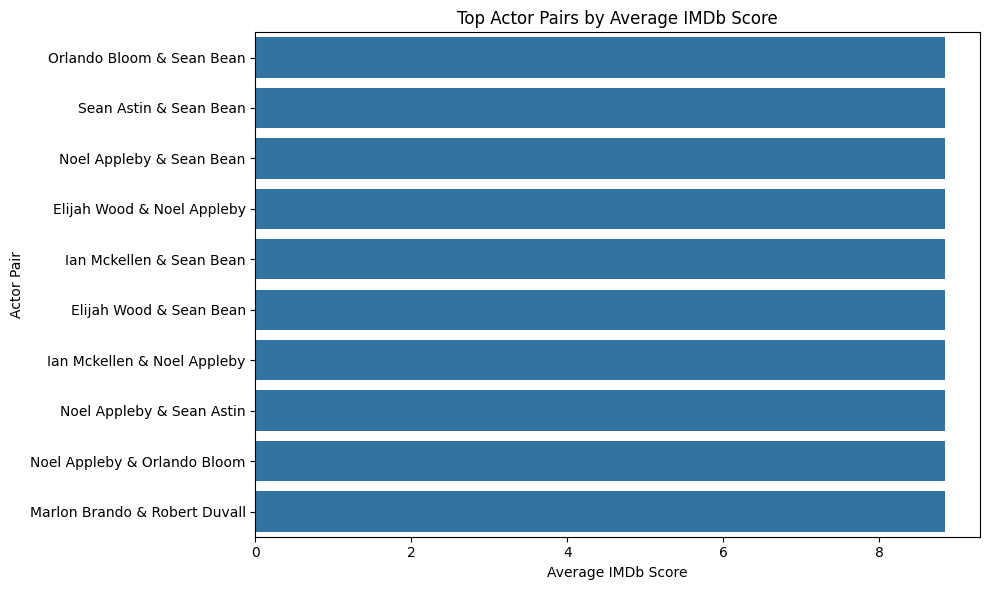

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

top_pairs = pair_stats.sort_values(by='avg_score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_pairs, x='avg_score', y=top_pairs['actor_1'] + ' & ' + top_pairs['actor_2'])
plt.title('Top Actor Pairs by Average IMDb Score')
plt.xlabel('Average IMDb Score')
plt.ylabel('Actor Pair')
plt.tight_layout()
plt.show()

### 8.4: Correlation Between IMDb Score and Collaboration Frequency

/var/folders/89/hz9lfyjx6dndz5lqz1m87clr0000gp/T/ipykernel_14132/1028432340.py:6: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/rogeriocaixeta/movie_challenge/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


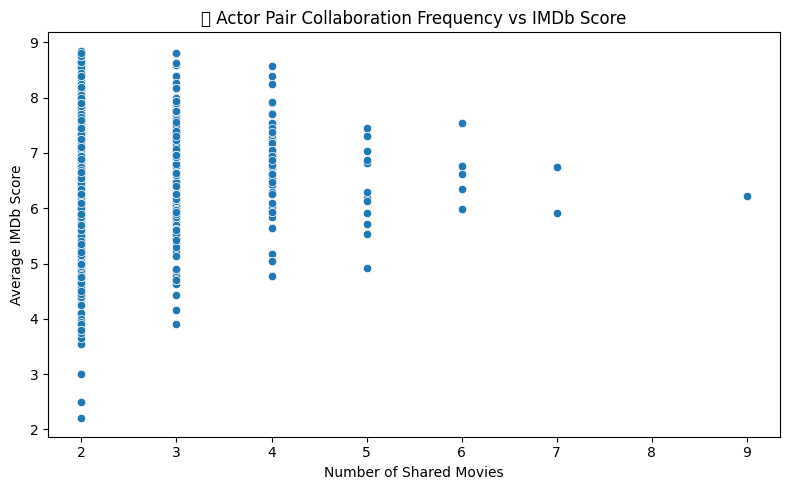

🔍 Correlation between collaboration frequency and IMDb score: 0.04


In [58]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=pair_stats, x='movie_count', y='avg_score')
plt.title('📈 Actor Pair Collaboration Frequency vs IMDb Score')
plt.xlabel('Number of Shared Movies')
plt.ylabel('Average IMDb Score')
plt.tight_layout()
plt.show()

correlation = pair_stats['movie_count'].corr(pair_stats['avg_score'])
print(f"🔍 Correlation between collaboration frequency and IMDb score: {correlation:.2f}")

### 8.5: Build undirected Graph and Find Largest Co-Acting Group

In [59]:
import networkx as nx

graph = nx.Graph()
for _, row in pair_stats.iterrows():
    graph.add_edge(row['actor_1'], row['actor_2'], weight=row['avg_score'])

# Find largest connected component (group)
largest_group = max(nx.connected_components(graph), key=len)
largest_subgraph = graph.subgraph(largest_group)

print(f"👥 Largest co-acting group contains {len(largest_group)} actors.")

# === Filter: Top 30 actors by degree (most connections) ===
top_nodes = sorted(largest_subgraph.degree, key=lambda x: x[1], reverse=True)[:30]
subset_nodes = [n for n, _ in top_nodes]
subset_graph = largest_subgraph.subgraph(subset_nodes)

👥 Largest co-acting group contains 1607 actors.


/var/folders/89/hz9lfyjx6dndz5lqz1m87clr0000gp/T/ipykernel_14132/1497739137.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


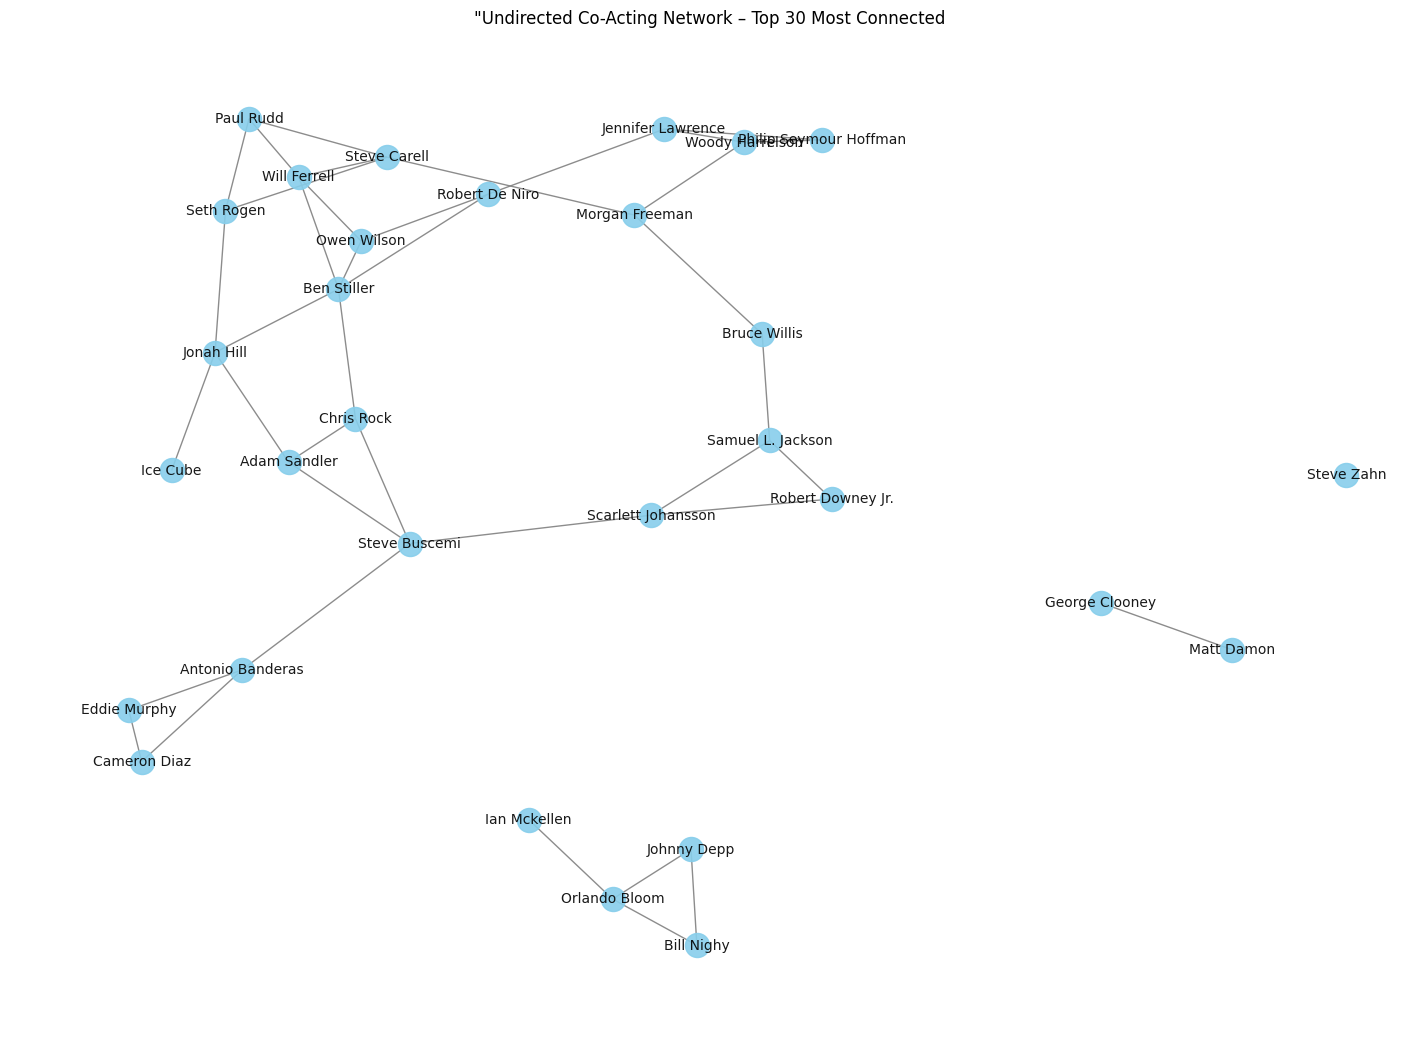

In [60]:
# Use spring layout with more spacing
pos = nx.spring_layout(subset_graph, k=1.2, iterations=100)

# Draw filtered subgraph
plt.figure(figsize=(14, 10))
nx.draw(subset_graph, pos,
        node_size=300,
        with_labels=True,
        font_size=10,
        node_color='skyblue',
        edge_color='gray',
        alpha=0.9)

plt.title('"Undirected Co-Acting Network – Top 30 Most Connected')
plt.axis('off')
plt.tight_layout()
plt.show()

### 8.6: Build directed Graph and Find Largest Co-Acting Group

In [61]:
directed_edges = []

for _, row in gold_df.iterrows():
    lead = row.get('actor_1_name')
    support_2 = row.get('actor_2_name')
    support_3 = row.get('actor_3_name')
    score = row.get('imdb_score')

    if lead:
        if pd.notnull(support_2):
            directed_edges.append((lead, support_2, score))
        if pd.notnull(support_3):
            directed_edges.append((lead, support_3, score))

In [62]:
from collections import defaultdict

edge_weights = defaultdict(list)

for src, tgt, score in directed_edges:
    if pd.notnull(score):
        edge_weights[(src, tgt)].append(score)

# Compute average score for each edge
aggregated_edges = [(src, tgt, sum(scores)/len(scores)) for (src, tgt), scores in edge_weights.items()]

In [63]:
role_graph = nx.DiGraph()
for src, tgt, weight in aggregated_edges:
    role_graph.add_edge(src, tgt, weight=weight)

print(f"🔁 Directed graph based on actor roles contains {role_graph.number_of_nodes()} actors and {role_graph.number_of_edges()} edges.")

# Step 4: Visualize top 30 most connected (by degree) in directed graph
top_nodes = sorted(role_graph.degree, key=lambda x: x[1], reverse=True)[:30]
subset_nodes = [n for n, _ in top_nodes]
subset_graph = role_graph.subgraph(subset_nodes)

🔁 Directed graph based on actor roles contains 6249 actors and 9552 edges.


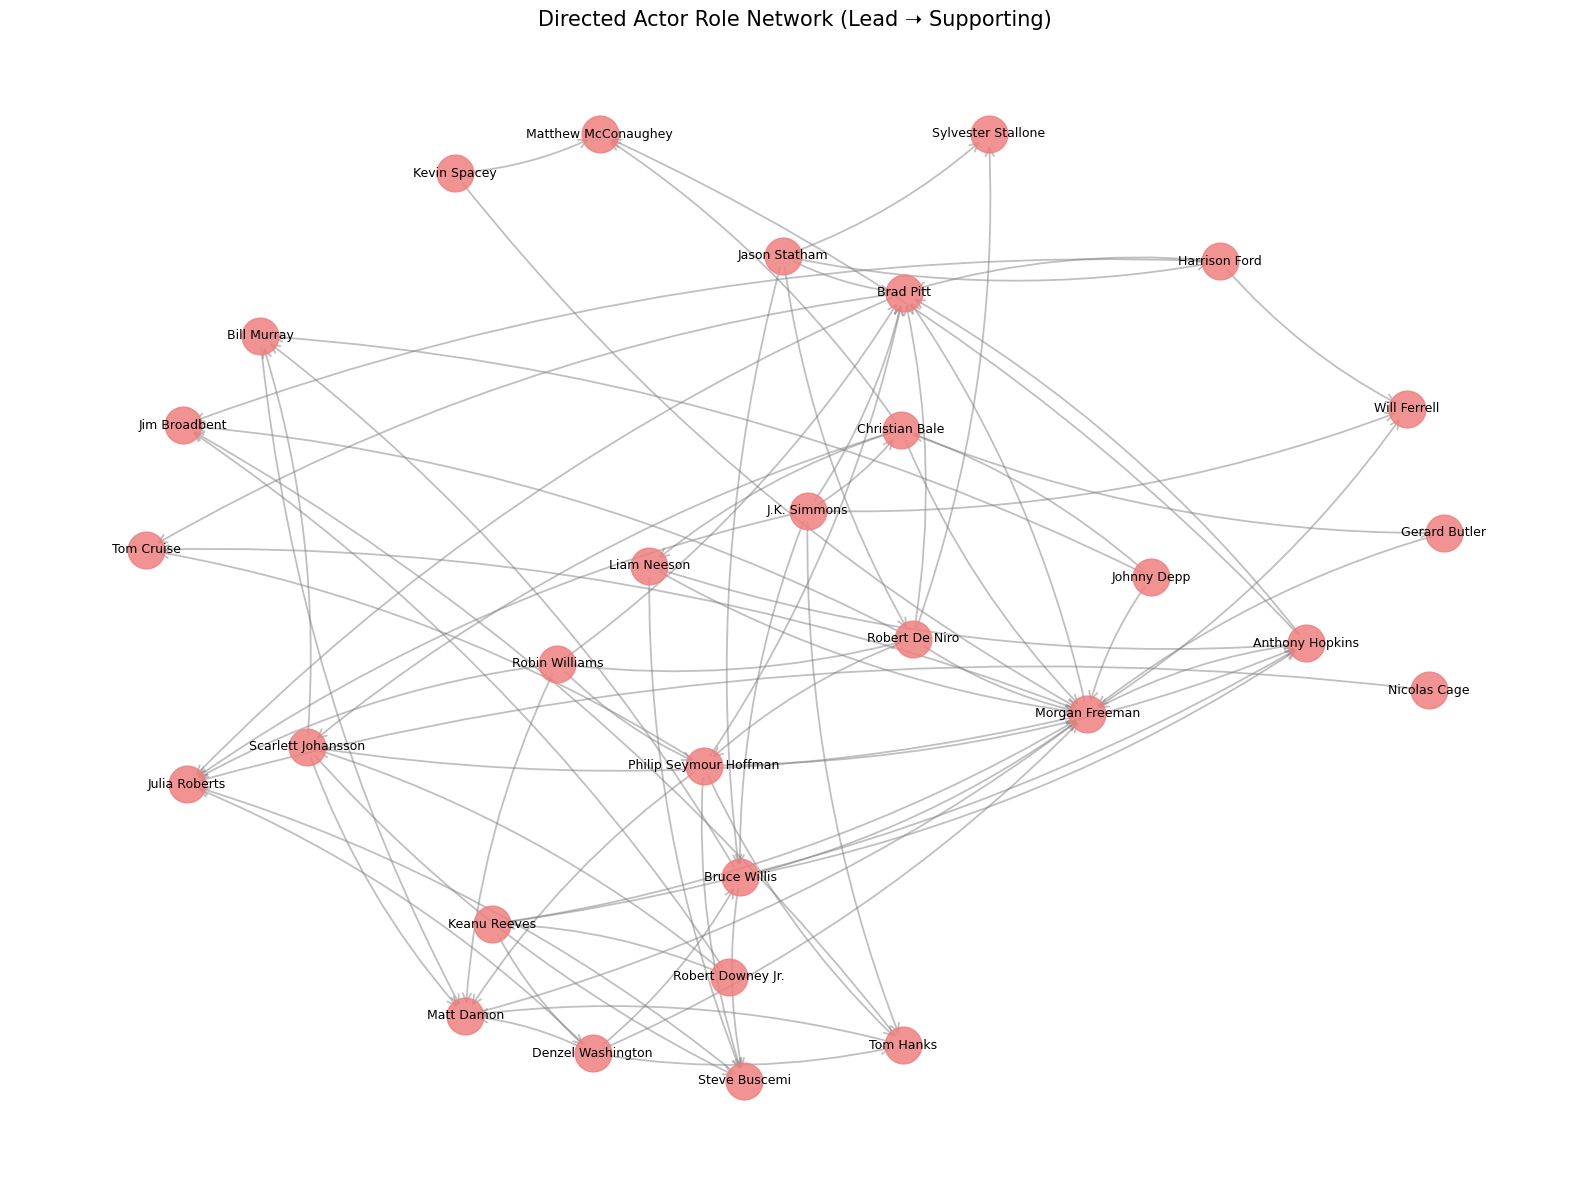

In [64]:
# Layout with more node repulsion (k↑ = more spread)
pos = nx.spring_layout(subset_graph, k=10, iterations=200)

plt.figure(figsize=(16, 12))

# Draw nodes
nx.draw_networkx_nodes(subset_graph, pos,
                       node_size=700,
                       node_color='lightcoral',
                       alpha=0.85)

# Draw directed edges with curvature
nx.draw_networkx_edges(subset_graph, pos,
                       edge_color='gray',
                       arrows=True,
                       arrowstyle='->',
                       arrowsize=15,
                       width=1.3,
                       connectionstyle='arc3,rad=0.1',
                       alpha=0.5)

# Draw node labels (increase font)
nx.draw_networkx_labels(subset_graph, pos, font_size=9)

plt.title("Directed Actor Role Network (Lead ➝ Supporting)", fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.show()

## 9. Business-Oriented Insight: Profitability, Segments & Roles

In this stage, I used the derived financial metrics (`profit`, `roi`) and cleaned metadata to extract insights with direct relevance to business, investment, and performance analysis.

These evaluations aim to answer key questions such as:  
- Which genres and people consistently deliver strong financial returns?  
- What types of films tend to be overperformers or underperformers?  
- How have production and return trends evolved over time?

This perspective is especially valuable in finance-oriented contexts where return on investment, cost efficiency, and strategic allocation are primary concerns.

---

### 🔍 Business-Centric Analyses Performed

1. **Profitability by Genre**  
   Exploded the standardized `genres_list` and grouped by genre to compute average `budget`, `gross`, `profit`, and `roi`. This reveals which genres tend to be the most (and least) financially successful on average.

2. **Top Profitable Directors and Actors**  
   Using exploded role columns, I grouped by person and calculated average `profit`, filtering to those with at least 3 credited movies. This highlights individuals who consistently deliver strong financial results.

3. **Business Classification**  
   Each movie was categorized based on financial strategy into one of four segments:
   - `blockbuster`: high budget, high gross
   - `sleeper_hit`: low budget, high ROI
   - `bomb`: high budget, low or negative ROI
   - `other`: neutral or unremarkable cases  
   Value counts and average ROI by class were included to show the distribution and performance of each segment.

4. **Financial Time Trends**  
   Grouped by `title_year`, I computed average `budget`, `gross`, `profit`, and `roi` to assess industry trends over time. This visualization highlights how investments and returns have evolved, revealing market dynamics and production shifts.

---

These business-oriented evaluations offer a deeper view into the data’s economic dimension and help surface high-return patterns, cost inefficiencies, and strategic roles in the movie industry.

### 9.1 Profitability by Genre

In [65]:
financial_df = gold_df.copy()

financial_df['genres_list'] = financial_df['genres_list'].dropna()
genre_profit = (
    financial_df.explode('genres_list')
    .groupby('genres_list')[['budget', 'gross', 'profit', 'roi']]
    .mean()
    .sort_values(by='roi', ascending=False)
)

display(
    genre_profit.head(10).style.format({
        'budget': '{:,.0f}',
        'gross': '{:,.0f}',
        'profit': '{:,.0f}',
        'roi': '{:.2f}'
    }).set_caption("🎬 Profitability by Genre")
)

,budget,gross,profit,roi
genres_list,,,,
documentary,"5,106,679","12,500,506","6,932,881",44.94
horror,"41,184,386","33,367,054","-18,242,752",30.59
mystery,"25,834,762","38,894,590","10,677,997",29.75
biography,"28,393,213","33,124,811","4,681,148",10.81
short,"2,015,667","3,926,267","909,267",4.53
western,"18,239,177","42,525,742","17,893,741",3.30
sport,"26,121,533","37,619,944","12,077,752",2.90
thriller,"36,565,495","44,744,356","3,193,268",2.56
romance,"27,970,349","34,516,688","6,270,770",2.23


### 9.2 Top Profitable Directors and Actors

In [66]:
# Top directors
top_directors = (
    financial_df.dropna(subset=['directors'])
    .explode('directors')
    .groupby('directors')['profit']
    .agg(['count', 'mean'])
    .query('count >= 3')
    .sort_values(by='mean', ascending=False)
)

# Top actors
top_actors = (
    financial_df.dropna(subset=['actors'])
    .explode('actors')
    .groupby('actors')['profit']
    .agg(['count', 'mean'])
    .query('count >= 3')
    .sort_values(by='mean', ascending=False)
)

# 🎬 Top 10 Directors by Average Profit
display(
    top_directors.head(10).style.format({
        'count': '{:.0f}',
        'mean': '{:,.0f}'  # Format as integer with thousands separator
    }).set_caption("🎬 Top 10 Directors by Average Profit")
)

# 🎭 Top 10 Actors by Average Profit
display(
    top_actors.head(10).style.format({
        'count': '{:.0f}',
        'mean': '{:,.0f}'
    }).set_caption("🎭 Top 10 Actors by Average Profit")
)

,count,mean
directors,,
George Lucas,5,"277,328,296"
Pierre Coffin,3,"245,526,947"
Chris Renaud,3,"241,018,940"
Joss Whedon,3,"199,202,360"
James Cameron,7,"171,375,130"
Pete Docter,3,"158,113,780"
Francis Lawrence,5,"151,100,394"
Andrew Adamson,4,"130,611,730"
Conrad Vernon,3,"127,056,632"


,count,mean
actors,,
Peter Mayhew,3,"332,906,608"
Mark Hamill,3,"332,906,608"
Anthony Daniels,6,"303,880,542"
Ian Mcdiarmid,4,"274,777,056"
Kenny Baker,3,"251,898,139"
Willow Shields,4,"239,603,691"
Michael Welch,3,"211,198,741"
Jennifer Saunders,3,"187,926,885"
Pernilla August,3,"178,776,360"


### 9.3 Business Classification

In [67]:
high_budget = financial_df['budget'].quantile(0.75)
low_budget = financial_df['budget'].quantile(0.25)

financial_df['business_class'] = np.select(
    [
        (financial_df['budget'] > high_budget) & (financial_df['gross'] > high_budget),
        (financial_df['budget'] < low_budget) & (financial_df['roi'] > 2),
        (financial_df['budget'] > high_budget) & (financial_df['roi'] < 0)
    ],
    ['blockbuster', 'sleeper_hit', 'bomb'],
    default='other'
)

# Recalculate business class metrics
business_class_counts = financial_df['business_class'].value_counts()
business_class_roi = financial_df.groupby('business_class')['roi'].mean()

# Combine into a single summary DataFrame
business_summary = pd.DataFrame({
    'Movie Count': business_class_counts,
    'Average ROI': business_class_roi
}).sort_values(by='Average ROI', ascending=False)

# Display with styling
business_summary.style\
    .bar(subset=["Movie Count"], color='lightblue')\
    .bar(subset=["Average ROI"], color='salmon')\
    .format({'Average ROI': '{:.2f}'})\
    .set_caption("📊 Business Class Performance Summary")

,Movie Count,Average ROI
business_class,,
sleeper_hit,250,70.66
other,3573,0.73
blockbuster,782,0.47
bomb,314,-0.64


### 9.4 Time Trends

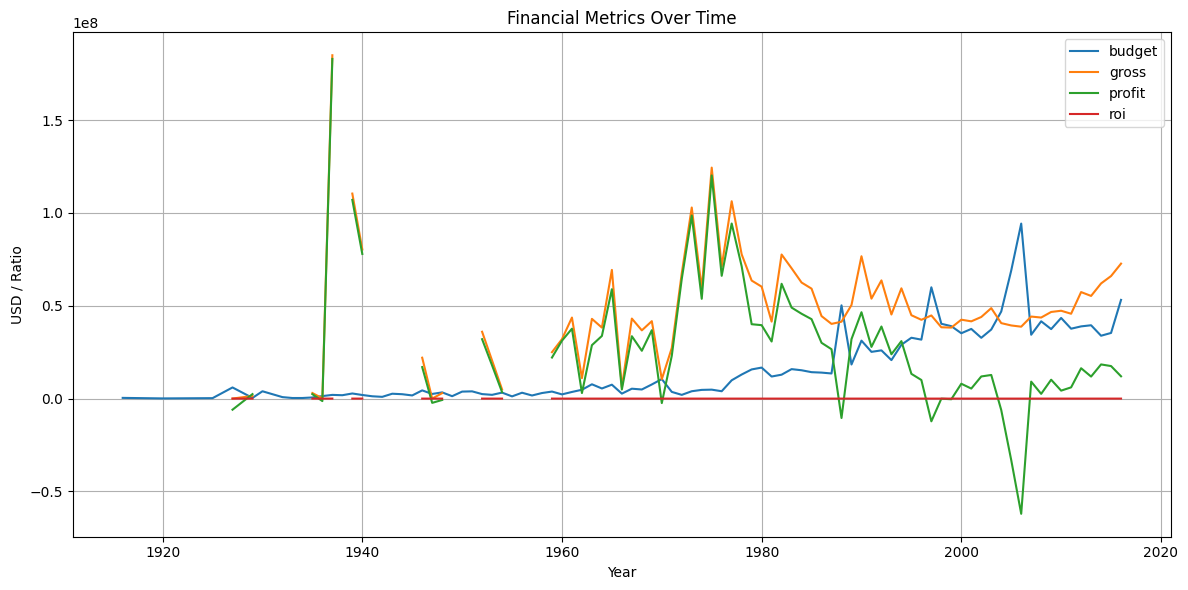

In [68]:
yearly_finance = (
    financial_df.dropna(subset=['title_year'])
    .groupby('title_year')[['budget', 'gross', 'profit', 'roi']]
    .mean()
)

yearly_finance.plot(figsize=(12, 6), title="Financial Metrics Over Time")
plt.ylabel("USD / Ratio")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()